# DAT300 - Compulsory Assignment 3
Stian Teien & Kristian Riksheim - Group19 - g19

## Notebook structure:
* Importing data
* Looking at y and x data
* Set up model and train it
* Further work

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math

import seaborn as sns

import pyprind
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'pyprind'

# Upload data
The data is big and flatten. This means we will have to extract it out in a smart way.  
The Y-data is small enough for the 250 pasients to have in memory and we'll be able to make a image out of it.  
The X-data is too big for out memory and we'll only be able to take out batches of it at once.

Each picture of a pasient has 191 * 256 = 50615 pixels of the data. This means we can cut it up in parts of 50615.  
The X-data has 64 channels so we can't "see" what the images is about. But that doesn't matter if we can see some statistics of it

In [43]:
y_data = pd.read_csv('/kaggle/input/dat300-h2020-ca3/y_train_250.csv')
x_data_iterator = pd.read_csv('/kaggle/input/dat300-h2020-ca3/X_train_250.csv', chunksize=50615)
y_data_iterator = pd.read_csv('/kaggle/input/dat300-h2020-ca3/y_train_250.csv', chunksize=50615)
# Split y up in chunks of data to split the images. Each image contains 191*265=50615 pixels

### Big data needs a solution
To extract our big data we need to look at it in chunks.  
Since eact image contains 50615 pixels (or rows) we can only have 9 images total in memory:  
`50615 pixel * 9 images < 500 000 rows`

500 000 rows is the limit of our memory (just in X-data)  

In [7]:
# Get a chunck of our data

def get_chunck(n_images=9):
    if n_images>9:
        raise KeyError('MAX 9 BILDER PER CHUCNK!!! Tar for stor plass')
    x_train = []
    y_train_batch = []
    for i, batch in enumerate(x_data_iterator):
        x_train.append(np.array(batch))

        if (i>=n_images-1):
            break
            
    for i, batch in enumerate(y_data_iterator):
        y_train_batch.append(np.array(batch))
        
        if (i>=n_images-1):
            break

    x_train = np.array(x_train) 
    y_train_batch = np.array(y_train_batch)
    
    return x_train, y_train_batch

In [8]:
# Partly scale all data
def scale():
    p1bar = pyprind.ProgBar(250)
    for i, batch in enumerate(x_data_iterator):
        scalar.partial_fit(batch, y_train[i].flatten())
        p1bar.update()

In [10]:
scalar = preprocessing.StandardScaler()
scale()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:02:16


In [11]:
scalar.mean_

array([0.39450371, 4.33672354, 0.01394436, 0.92572   , 1.9900826 ,
       0.20038756, 1.88611799, 0.33279308, 0.31207775, 0.42843493,
       0.26958882, 1.62651746, 0.03585814, 0.35906781, 0.05717742,
       0.38496759, 1.93191821, 0.95457966, 0.8035335 , 0.01902625,
       2.59238931, 0.32371454, 0.46279633, 1.96592634, 0.30496347,
       0.33996978, 2.75323305, 0.80051856, 2.06848554, 0.04065436,
       1.02807259, 0.62194773, 3.74735149, 1.43108772, 4.66489509,
       1.07129373, 0.05621293, 0.53809864, 0.51814402, 2.16162565,
       0.79950362, 2.18715147, 0.61699362, 0.28617411, 2.89584986,
       0.34527609, 0.47304964, 0.11370603, 0.19227676, 0.02096576,
       1.46122639, 1.75251147, 0.19830515, 0.04584902, 0.0141149 ,
       0.81381328, 1.28051782, 0.41403594, 0.00978146, 0.83738813,
       0.31437063, 0.29646602, 1.22771003, 1.02870654])

## Take a look at y data
See if we can see how the images are and how the tumor could look like.  
Split up in images and reshape them as an image

y-shape: (250, 191, 265)


Picture of the tumor :S


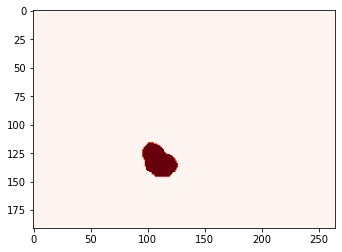

In [9]:
# Make y data ready and show it

y_train = []
img_size = 50615
amount_of_images = y_data.shape[0]/img_size
for i in range(0, int(math.floor(amount_of_images))):
    y_train.append(np.reshape(y_data.target[i*img_size:(i+1)*img_size].to_numpy(), (191, 265)))
    
y_train = np.array(y_train)
print(f"y-shape: {y_train.shape}")
print("\n\nPicture of the tumor :S")
plt.imshow(y_train[111], cmap='Reds')
plt.show()

## Take a look at X-data
See if there is any outlayers and have a breif look at the disp of the data

In [44]:
# ta en titt på x_data
x,y = get_chunck(1)

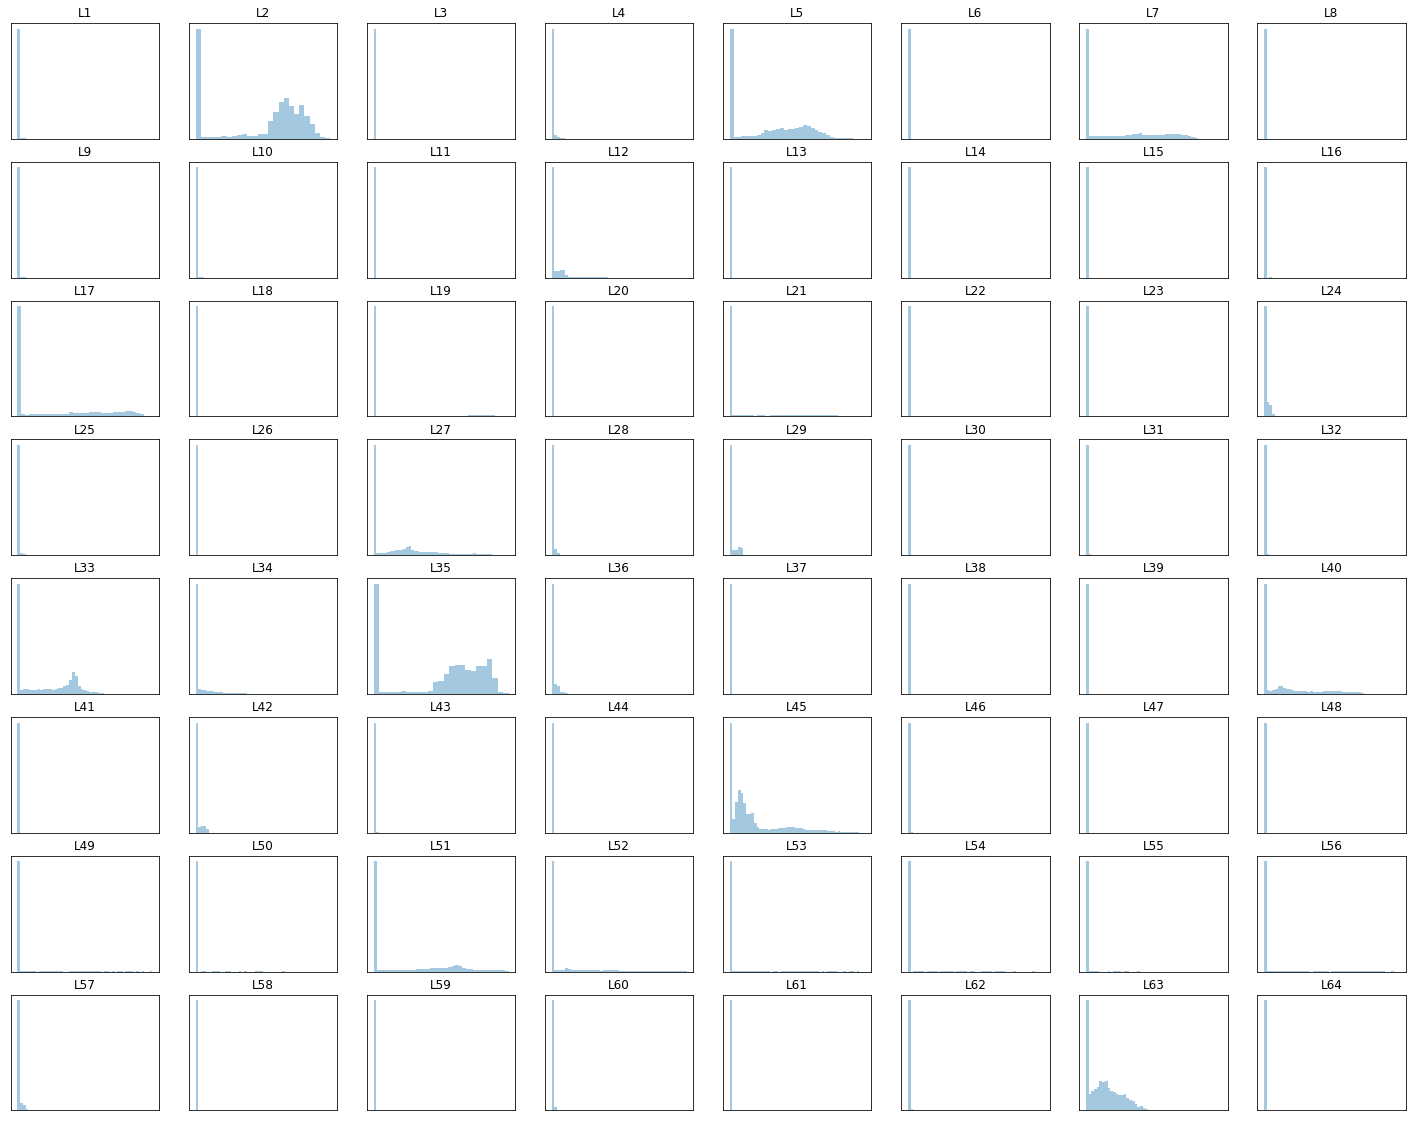

In [45]:
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(25,20))
for i in range(64):
    axes[i//8,i%8] = sns.distplot(x[0][:,i] ,ax=axes[i//8,i%8], kde=False)
    axes[i//8,i%8].set_title(f"L{i+1}")
    axes[i//8,i%8].get_xaxis().set_visible(False)
    axes[i//8,i%8].get_yaxis().set_visible(False)


## Take a look at X-data with active tumor
Since there is sooo many pixel with no tumor we can't realy see what data is in the "tumoractived"-area.  
We extract only the areas with tumor and take a look at the X-data  

Se på L10 f.eks: Her er det mye på hele bildet med på tumor'en er det kun en verdi uten stor variasjon (og L5 og L35)  
Hva kan man trekke ut av det? At alle 1 er en verdi men med 0 har det variasjon - Vi kan trekke dette ut av datasette (men det får bli senere)

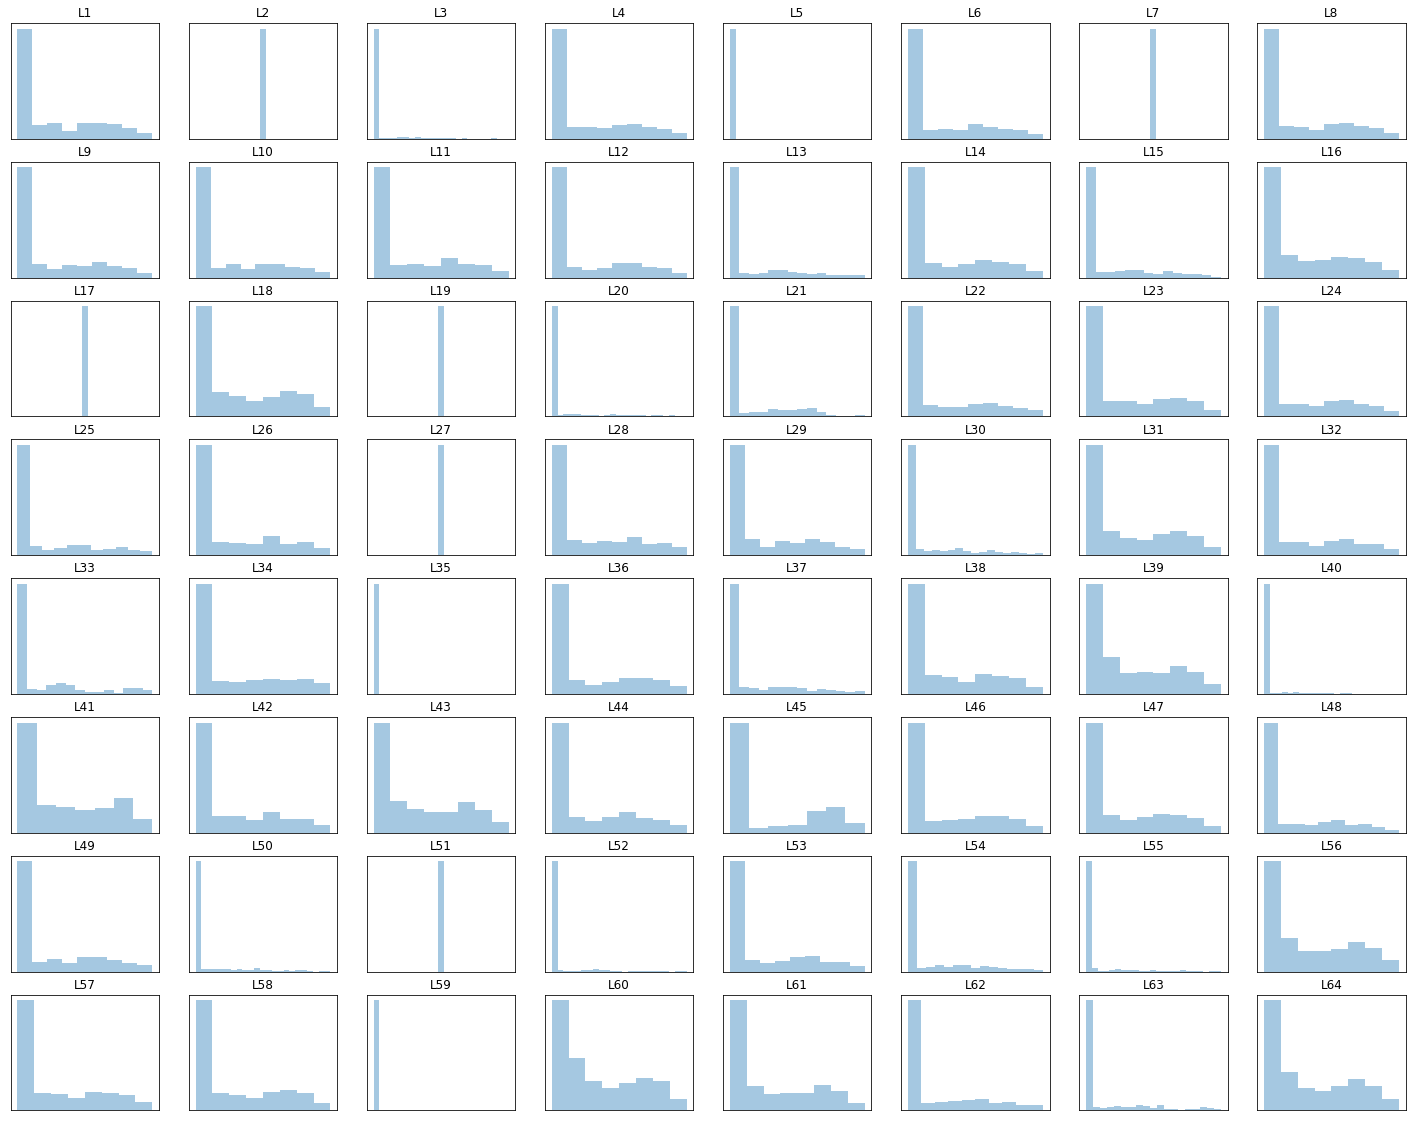

In [46]:
tumor_area = np.argwhere(y[0] > .5)
tumor_pixel = []

for i in range(len(tumor_area)):
    tumor_pixel.append(x[0][tumor_area[i][0]])
    
tumor_pixel = np.array(tumor_pixel)

# Print it out
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(25,20))
for i in range(64):
    axes[i//8,i%8] = sns.distplot(tumor_pixel[:,i] ,ax=axes[i//8,i%8], kde=False)
    axes[i//8,i%8].set_title(f"L{i+1}")
    axes[i//8,i%8].get_xaxis().set_visible(False)
    axes[i//8,i%8].get_yaxis().set_visible(False)

## Heatmap
Cant really use it and don't see a connection with the data from last figure..

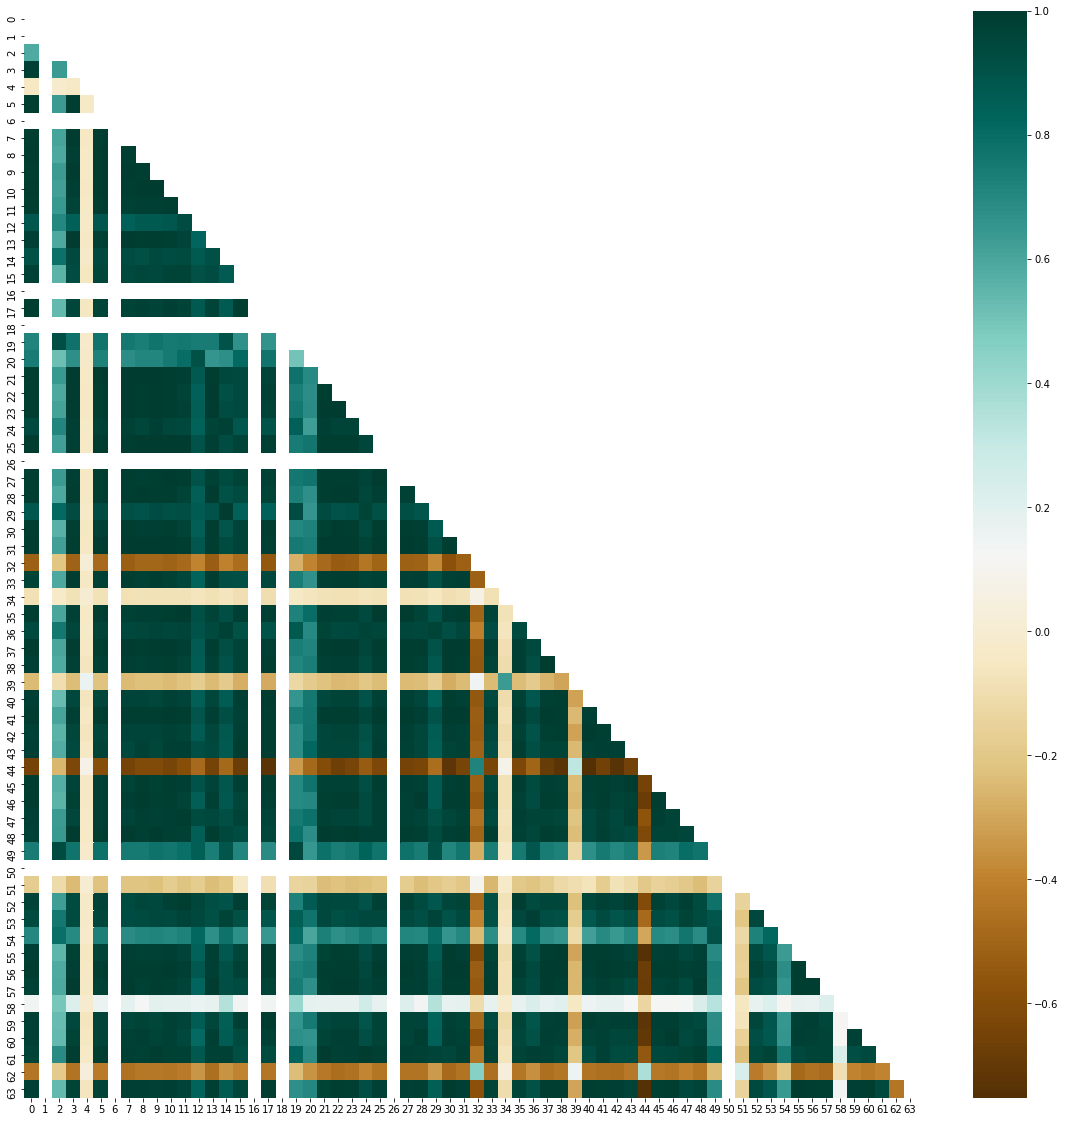

In [47]:
a = pd.DataFrame(tumor_pixel)
mask = np.triu(np.ones_like(a.corr(), dtype=np.bool))
plt.figure(figsize=(20, 20))
sns.heatmap(a.corr(), cmap='BrBG', mask=mask)

# Train model
Use a sklearn method:  
Will try out  
`Perceptron`  
`SGDclassifier`  
`PassiveAggressiveClassifier`  
`RidgeClassifier`

They have partical_fit


In [52]:
# Reset iterator
x_data_iterator = pd.read_csv('/kaggle/input/dat300-h2020-ca3/X_train_250.csv', chunksize=50615)
y_data_iterator = pd.read_csv('/kaggle/input/dat300-h2020-ca3/y_train_250.csv', chunksize=50615)

In [39]:
sgd = SGDClassifier(random_state=42)
pac = PassiveAggressiveClassifier(C=0.00075, random_state=42) # Credit to group Fugletribunalet for good input :)
per = Perceptron(random_state=42)
rig = RidgeClassifier(alpha= 2, normalize = True, class_weight="balanced",random_state=42)

f1 = []
f1_val = []

model = pac

In [40]:
runder = 250
p1bar = pyprind.ProgBar(runder)
for _ in range(runder):
    x,y = get_chunck(n_images=1)
    for i, x_batch in enumerate(x):
        model.partial_fit(scalar.transform(x_batch), y[i].ravel(), classes=range(2))
        pred = model.predict(scalar.transform(x_batch))
        f1.append(f1_score(pred, y[i]))
        
    p1bar.update()


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:02:11


In [49]:
# Eval / test
runder = 250
p1bar = pyprind.ProgBar(runder)
for _ in range(runder):
    x,y = get_chunck(n_images=1)
    for i, x_batch in enumerate(x):
        pred = model.predict(scalar.transform(x[i]))
        f1_val.append(f1_score(pred, y[i]))
        
    p1bar.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:56


### Take a look at the results
Here we can see that the f1 scores dosen't increase much and often falls down when a new image is introduced  
The f1_val score is new images that the model is not trained on 

To give a quick indicator that the model is not "på jordet" it possible to print prediciton and true

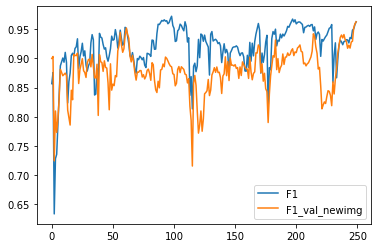

In [50]:
print(np.mean(f1_val))
plt.plot(f1, label="F1")
plt.plot(f1_val, label="F1_val_newimg")
plt.legend()
plt.show()


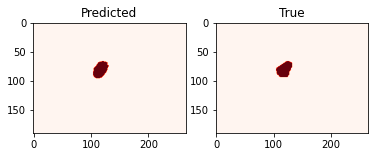

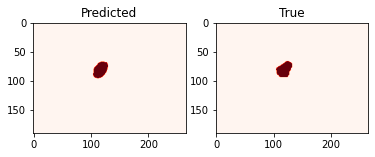

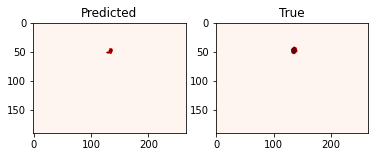

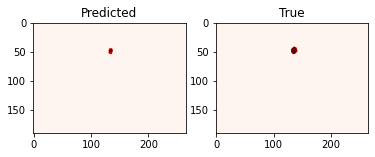

In [27]:
x,y = get_chunck(n_images=4)
y_pred = [model.predict(scalar.transform(i)) for i in x]

for i,b in enumerate(y_pred):
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(np.reshape(y_pred[i], (191,265)), cmap="Reds")
    axarr[0].set_title('Predicted')
    axarr[1].imshow(np.reshape(y[i], (191,265)), cmap="Reds")
    axarr[1].set_title('True')
    plt.show()
    

# Save prediction and download
Load the test set, make a prediction and download to kaggle comp. 🎉

In [29]:
x_pred = []
x_test_iterator = pd.read_csv('/kaggle/input/dat300-h2020-ca3/X_test_100.csv', chunksize=50615)
pbar = pyprind.ProgBar(100)

for i, batch in enumerate(x_test_iterator):
    pred = model.predict(scalar.transform(batch))
    for j in pred:
        if j < .5:
            x_pred.append(False)
        else:
            x_pred.append(True)        
    pbar.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:03


In [30]:
x_pred_df = pd.DataFrame(x_pred, columns=["Predicted"])
x_pred_df = x_pred_df.reset_index()
x_pred_df = x_pred_df.rename(columns={'index':'Id'})
x_pred_df.to_csv('pred.csv', index=False)

# Videre arbeid - trekke ut kun det viktige
En ide kan være å filtere ut data som omligger kreften og kun bruke de. For det virker som det er data i kanten av svulsten den sliter med å klassifisere riktig :)

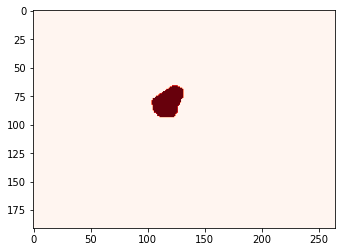

In [53]:
x,y = get_chunck(1)
y=y[0]
y = np.reshape(y, (191, 265))

plt.imshow(y, cmap="Reds")

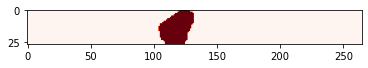

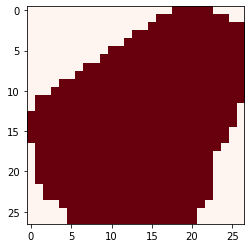

In [54]:
x_coords = []
y_coords = []

for i in range(191):
    if max(y[i,:]) == 1:
        y_coords.append(i)
        
for i in range(265):
    if max(y[:,i]) == 1:
        x_coords.append(i)
        
plt.imshow(y[y_coords[0]:y_coords[-1]], cmap="Reds")
plt.show()
plt.imshow(y[y_coords[0]:y_coords[-1], x_coords[0]:x_coords[-1]], cmap="Reds")
plt.show()


## Ønsker å ha rundtliggende pixler også
Det kan vi gjøre ved å doble arealet til bildet. 

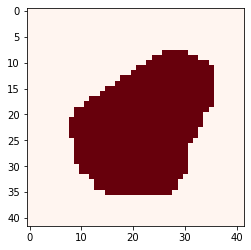

In [55]:
ny_lengde = math.ceil(math.sqrt(2*len(x_coords)*len(y_coords)))
x_add = int(math.ceil(len(x_coords) - ny_lengde/2))
y_add = int(math.ceil(len(y_coords) - ny_lengde/2))
ny_x = [i for i in range(x_coords[0] - x_add, x_coords[-1] + x_add)]
ny_y = [i for i in range(y_coords[0] - y_add, y_coords[-1] + y_add)]

plt.imshow(y[ny_y[0]:ny_y[-1], ny_x[0]:ny_x[-1]], cmap="Reds")

## Sette opp en pipeline
For å trene på mange nedkorteteede bilder

In [31]:
def get_reduse_images(n_images):
    red_y = []
    red_x = []
    x_data,y_data = get_chunck(n_images)
    
    for j,y in enumerate(y_data):
        y = np.reshape(y, (191, 265))
        x_coords = []
        y_coords = []
        for i in range(191):
            if max(y[i,:]) == 1:
                y_coords.append(i)

        for i in range(265):
            if max(y[:,i]) == 1:
                x_coords.append(i)
                
        ny_lengde = math.ceil(math.sqrt(2*len(x_coords)*len(y_coords)))
        x_add = int(math.ceil(len(x_coords) - ny_lengde/2))
        y_add = int(math.ceil(len(y_coords) - ny_lengde/2))
        ny_x = [i for i in range(x_coords[0] - x_add, x_coords[-1] + x_add)]
        ny_y = [i for i in range(y_coords[0] - y_add, y_coords[-1] + y_add)]
        
        y = y[ny_y[0]:ny_y[-1], ny_x[0]:ny_x[-1]]
        x = np.reshape(x_data[j], (191, 265, 64))
        x = x[ny_y[0]:ny_y[-1], ny_x[0]:ny_x[-1]]
          
        red_y.append(y)
        red_x.append(x)
    

    red_y = np.array(red_y)
    red_x = np.array(red_x)

    
    return red_x, red_y
        

In [32]:
def get_half_images(n_images):
    x_data,y_data = get_chunck(n_images)
    
    red_y = []
    red_x = []
   
    ny_x = [i for i in range(47, 143)]
    ny_y = [i for i in range(66, 198)]
    
    for j,y in enumerate(y_data):
        y = np.reshape(y, (191, 265))
        y = y[ny_y[0]:ny_y[-1], ny_x[0]:ny_x[-1]]
        x = np.reshape(x_data[j], (191, 265, 64))
        x = x[ny_y[0]:ny_y[-1], ny_x[0]:ny_x[-1]]

        
        red_y.append(np.reshape(y, (y.shape[0]*y.shape[1], )))
        red_x.append(np.reshape(x, (x.shape[0]*x.shape[1], 64)))
    
    red_y = np.array(red_y)
    red_x = np.array(red_x)

    return red_x, red_y
        

## Train model on redused data

In [33]:
# Reset iterator
x_data_iterator = pd.read_csv('/kaggle/input/dat300-h2020-ca3/X_train_250.csv', chunksize=50615)
y_data_iterator = pd.read_csv('/kaggle/input/dat300-h2020-ca3/y_train_250.csv', chunksize=50615)

In [34]:
model = PassiveAggressiveClassifier(C=0.00075, random_state=42)
f1 = []
f1_val = []

In [35]:
# Train model on half images

runder = 250
p1bar = pyprind.ProgBar(runder)
for _ in range(runder):
    x,y = get_half_images(n_images=1)
    for i, x_batch in enumerate(x):
        model.partial_fit(scalar.transform(x_batch), y[i], classes=range(2))
        pred = model.predict(scalar.transform(x_batch))
        f1.append(f1_score(pred,y[i]))
    
        
    p1bar.update()


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMe

In [119]:
# Eval / test
runder = 250
p1bar = pyprind.ProgBar(runder)
for _ in range(runder):
    x,y = get_chunck(n_images=1)
    for i, x_batch in enumerate(x):
        pred = model.predict(scalar.transform(x[i]))
        f1_val.append(f1_score(pred, y[i]))
        
    p1bar.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:53


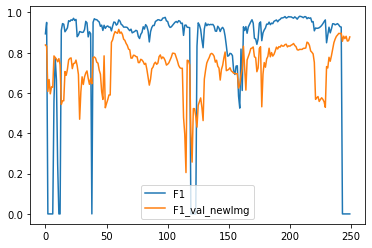

In [120]:
plt.plot(f1, label="F1")
plt.plot(f1_val, label="F1_val_newImg")
plt.legend()
plt.show()

# Konklunsjon på dette sidesportet
Det virker som om modellen ikke klarer å se helheten når den kun får halvparten. Det gjør at den tror det svultser over alt.. 
Modellen ble iallefall sjukt god på å finne det rundt, men totaltsett ganske dårlig..  
Tanken var å kunne balansere settet litt mer kun ved å ta det rundt, men det gikk sånn halveis  
Det som skjer er at den ikke klarer ting utenfor det trente bildet og gjetter helt feil.

La oss printe noen bilder av det modellen foreslår så ser man det litt tydligere  
Så det ser ut som det kun er noen den sliter på.. Det ser man klart på f1.

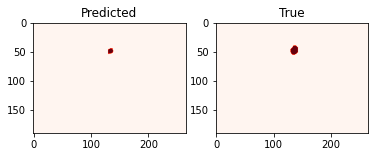

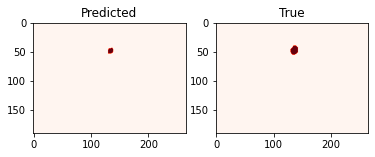

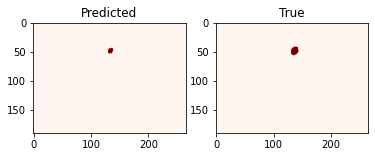

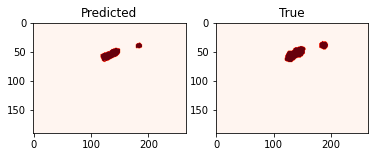

In [124]:
x,y = get_chunck(n_images=4)
y_pred = [model.predict(scalar.transform(i)) for i in x]

for i,b in enumerate(y_pred):
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(np.reshape(y_pred[i], (191,265)), cmap="Reds")
    axarr[0].set_title('Predicted')
    axarr[1].imshow(np.reshape(y[i], (191,265)), cmap="Reds")
    axarr[1].set_title('True')
    plt.show()
    